# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
#importing libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [6]:
#Reading twitter Archive Enhanced csv file into dataframe df and showing a preview of the data
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [7]:
#making a http request to url and writing response to image predictions (tsv file)
import requests
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [8]:
#Reading saved image_predictions.tsv file
predictions = pd.read_csv('image_predictions.tsv', sep='\t')
predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
#!pip install --upgrade tweepy==4.4

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [10]:
#Reading provided tweet_json.txt file and appending to an empty list
import json

tweets = []
for line in open('tweet_json.txt','r'):
    tweets.append(json.loads(line))

In [11]:
#display list elements
tweets

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

In [12]:
#Converting tweet list to a pandas dataframe
df_tweetjson = pd.DataFrame(tweets)
df_tweetjson.head()

contributors coordinates                      created_at display_text_range  \
0         None        None  Tue Aug 01 16:23:56 +0000 2017            [0, 85]   
1         None        None  Tue Aug 01 00:17:27 +0000 2017           [0, 138]   
2         None        None  Mon Jul 31 00:18:03 +0000 2017           [0, 121]   
3         None        None  Sun Jul 30 15:58:51 +0000 2017            [0, 79]   
4         None        None  Sat Jul 29 16:00:24 +0000 2017           [0, 138]   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  favorite_count  \
0  {'media': [{'id': 892420639486877696, 'id_str'...           39467   
1  {'media': [{'id': 892177413194625024, 'id_str'...           33819   
2  {'media': [{'id': 891815175371796480, 'id_str'...           25461   
3  {'media': [{'id': 891689552724799489, 'id_str'...           42908   
4  {'media': [{'id': 891327551943041024, 'id_str'...           41048   

   favorited                                          full_text   geo  \
0      False  This is Phineas. He's a mystical boy. Only eve...  None   
1      False  This is Tilly. She's just checking pup on you....  None   
2      False  This is Archie. He is a rare Norwegian Pouncin...  None   
3      False  This is Darla. She commenced a snooze mid meal...  None   
4      False  This is Franklin. He would like you to stop ca...  None   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

   possibly_sensitive_appealable quoted_status quoted_status_id  \
0                          False           NaN              NaN   
1                          False           NaN              NaN   
2                          False           NaN              NaN   
3                          False           NaN              NaN   
4                          False           NaN              NaN   

   quoted_status_id_str retweet_count  retweeted retweeted_status  \
0                   NaN          8853      False              NaN   
1                   NaN          6514      False              NaN   
2                   NaN          4328      False              NaN   
3                   NaN          8964      False              NaN   
4                   NaN          9774      False              NaN   

                                              source truncated  \
0  <a href="http://twitter.com/download/iphone" r...     False   
1  <a href="http://twitter.com/download/iphone" r...     False   
2  <a href="http://twitter.com/download/iphone" r...     False   
3  <a href="http://twitter.com/download/iphone" r...     False   
4  <a href="http://twitter.com/download/iphone" r...     False   

                                                user  
0  {'id': 4196983835, 'id_str': '4196983835', 'na...  
1  {'id': 4196983835, 'id_str': '4196983835', 'na...  
2  {'id': 4196983835, 'id_str': '4196983835', 'na...  
3  {'id': 4196983835, 'id_str': '4196983835', 'na...  
4  {'id': 4196983835, 'id_str': '4196983835', 'na...  

[5 rows x 31 columns]

In [13]:
#Selecting only the id, favorite_count and retweet_count columns data
df_tweetjson = df_tweetjson[['id','favorite_count','retweet_count']]
df_tweetjson.head()

id  favorite_count  retweet_count
0  892420643555336193           39467           8853
1  892177421306343426           33819           6514
2  891815181378084864           25461           4328
3  891689557279858688           42908           8964
4  891327558926688256           41048           9774

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The twitter archive enhanced data has 2356 entries. 

The timestamp column has an object data type that needs to be fixed. We can also see that some columns have missing values but for the purpose of our analysis, the columns with missing values such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp, expanded urls are of little interest.

In [15]:
df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

This gives us a sense of the distribution of the quantitative variables in our data. We can see that the rating nmerator and denominator columns have maximum values of 1776 and 170 respectively. This does not conform with the expected values. Also, the minimum values of the rating numerator and rating denominator are both 0. This does not also conform to the expected values.

The weratedogs use a specific rating system where the denominator is always 10 and the numerator is always greater than 10 but can never be as high as 170 or 1776. Since we are not giving a maximum value of our grading system, we will exploer more the see the distribution of the ratings in both columns

In [16]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
df[df['rating_denominator'] != 10].shape[0]

23

We can see that the count of ratings not equal to 10 is 23. We will drop entries with these values since they are small compared to the size of our dataset

In [18]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
#finding number of entries with numerator ratings between 10 and 15
df.query('rating_numerator >= 10 and rating_numerator <= 15').shape[0]

1890

We see the distribution of the numerator ratings above has a lot of outliers that can greatly skew our analysis if not controlled. Since Weratedogs always rate dogs at or above 10. We select values from 10 to 15 for the numerator since these seem more plausible.

Rating 10 has a count of 261 and rating 15 has a count of 2. The count of values between 10 and 15 is 1890. Out of 2356 entries, we have 1890 that we are going to work with which seem sensible. 

In [20]:
#Checking for duplicate entries
df.duplicated().sum()

0

In [21]:
#looking at entries and frequency in the name column
df.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
an             7
Buddy          7
Toby           7
Daisy          7
Stanley        6
Leo            6
Scout          6
Bella          6
Oscar          6
Rusty          6
Dave           6
Jax            6
Koda           6
Milo           6
Jack           6
Alfie          5
            ... 
Dylan          1
Mojo           1
Crouton        1
Monty          1
Geoff          1
Shawwn         1
Duddles        1
Amélie         1
Sprinkles      1
Shelby         1
Kuyu           1
Pupcasso       1
Taz            1
Sora           1
Ralf           1
Bertson        1
Laika          1
Mason          1
Asher          1
Cal            1
Gilbert        1
Filup          1
Pancake        1
Miguel         1
Mollie         1
Spark          1
Wishes         1
Horace        

Looking at the name column in the twitter enhanced dataset, we see that a lot of names which are not dog names are present such as infuriating etc and also None values are present. We have to find a way to handle this during the cleaning operation

In [22]:
df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [23]:
df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [24]:
df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [25]:
df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

Looking through the dog stages columns(floofer, pupper, puppo, doggo, puppo), we see that None values are present in these columns. We will be looking to merge these columns into one column for a tidier data

In [26]:
df['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/844704788403113984/photo/1                                                                                                                                                                                                                                                 2
https://twitter.com/dog_rates/status/750719632563142656/photo/1                                                                                                                                                                                                                                                 2
https://twitter.com/dog_rates/status/694669722378485760/photo/1,https://twitter.com/dog_rates/status/694669722378485760/photo/1                                                                                                                                                                                 2
https://twitter.com/dog_rates/status/842163532590374912/photo/1,https://twitter.co

In [27]:
urldf = df['expanded_urls'].value_counts().to_frame()
urldf.head()

expanded_urls
https://twitter.com/dog_rates/status/8447047884...              2
https://twitter.com/dog_rates/status/7507196325...              2
https://twitter.com/dog_rates/status/6946697223...              2
https://twitter.com/dog_rates/status/8421635325...              2
https://twitter.com/dog_rates/status/7626998581...              2

In [28]:
urldf[urldf['expanded_urls']==2].shape[0]

79

In [29]:
df[df['expanded_urls'] == 'https://twitter.com/dog_rates/status/681694085539872773/photo/1']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
583   800188575492947969                    NaN                  NaN   
1683  681694085539872773                    NaN                  NaN   

                      timestamp  \
583   2016-11-20 04:06:37 +0000   
1683  2015-12-29 04:31:49 +0000   

                                                 source  \
583   <a href="http://twitter.com/download/iphone" r...   
1683  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
583   RT @dog_rates: This is Bo. He's a Benedoop Cum...         6.816941e+17   
1683  This is Bo. He's a Benedoop Cumbersnatch. Seem...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
583               4.196984e+09  2015-12-29 04:31:49 +0000   
1683                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
583   https://twitter.com/dog_rates/status/681694085...                11   
1683  https://twitter.com/dog_rates/status/681694085...                11   

      rating_denominator name doggo floofer  pupper puppo  
583                   10   Bo  None    None  pupper  None  
1683                  10   Bo  None    None  pupper  None

We can see that the expanded url column has some urls that occur twice. Upon further investigation, we see that this entries are retweets. Without digging too much, we wil keep an eye out for this and upon deleting retweets confirm that all urls occur once once in the dataset

In [30]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Upon initial observation, The predictions dataset looks pretty neat. No null values noticed and the data types are appropriate

In [31]:
predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

Range values seem plausible and are consistent with our data description

In [32]:
predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [33]:
predictions.tweet_id.duplicated().sum()

0

In [34]:
jpg_urldf = predictions.jpg_url.value_counts().to_frame()
jpg_urldf.head()

jpg_url
https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg           2
https://pbs.twimg.com/tweet_video_thumb/CeBym7o...        2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg           2
https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg           2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg           2

In [35]:
jpg_urldf[jpg_urldf['jpg_url']==2].shape[0]

66

In [36]:
#In Predictions dataset, some tweet ids are for the same image
predictions[predictions['jpg_url']=='https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg']

tweet_id                                          jpg_url  \
1209  742423170473463808  https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg   
1476  780496263422808064  https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg   

      img_num   p1  p1_conf  p1_dog                 p2   p2_conf  p2_dog  \
1209        1  pug  0.99731    True  Brabancon_griffon  0.001186    True   
1476        1  pug  0.99731    True  Brabancon_griffon  0.001186    True   

                  p3   p3_conf  p3_dog  
1209  French_bulldog  0.000428    True  
1476  French_bulldog  0.000428    True

Looking at our jpg url column, we see that some jpg urls have a frequency of 2 and upon further investigation, they appear to be duplicate entries as all other parameters match except tweet ids. There are 66 instances

In [37]:
predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
Shetland_sheepdog             18
beagle                        18
Maltese_dog                   18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [38]:
predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
miniature_pinscher                 20
chow                               20
malinois                           20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [39]:
predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

Looking at our p1,p2 and p3 values, we see that some names are not dog names such as web_site, seat_belt, electric_fan and so on. We will need to find a way to deal with this during our cleaning operation

In [40]:
df_tweetjson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


No null values present. Data types are on point. 

We will need to rename id column to tweet_id to merge all 3 datasets

In [41]:
df_tweetjson.describe()

id  favorite_count  retweet_count
count  2.354000e+03     2354.000000    2354.000000
mean   7.426978e+17     8080.968564    3164.797366
std    6.852812e+16    11814.771334    5284.770364
min    6.660209e+17        0.000000       0.000000
25%    6.783975e+17     1415.000000     624.500000
50%    7.194596e+17     3603.500000    1473.500000
75%    7.993058e+17    10122.250000    3652.000000
max    8.924206e+17   132810.000000   79515.000000

In [42]:
df_tweetjson.duplicated().sum()

0

No duplicates entries present

### Quality issues

twitter-archive-enhanced Table

1. Timestamp - type object

3. retweet status id - type float

4. Rating denominator not equal to 10 in some entries

5. rating numerator less than 10 and greater than 15 in some entries

6. name column has none, a, an, etc as dog names

7. Some Expanded urls ooccur twice in the data as retweets are present 

image_predictions Table

8. some rows with p1 values that are not dog names

9. some rows with p2 values that are not dog names

10. some rows with p3 values that are not dog names

11. Duplicate jpg urls values with different tweet ids

tweet-json Table
 
12. id column name should be changed to tweet_id for consistency

### Tidiness issues

twitter-archive-enhanced Table
1. dog stages(puppo, doggo, pupper, fluffer) should be in one column

2. Some columns( eg: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp) should be dropped

image_predictions Table

3. Some columns  should be dropped(eg: p3 p3_dog, p3_conf)

tweet-json Table



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [43]:
# Make copies of original pieces of data
df_copy = df.copy()
predictions_copy = predictions.copy()
dftweetjson_copy = df_tweetjson.copy()

In [44]:
#twitter archive enhanced
df_copy.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [45]:
df_copy.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [46]:
#img num corresponds to the most confident prediction
predictions_copy.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [47]:
dftweetjson_copy.head()

id  favorite_count  retweet_count
0  892420643555336193           39467           8853
1  892177421306343426           33819           6514
2  891815181378084864           25461           4328
3  891689557279858688           42908           8964
4  891327558926688256           41048           9774

### Issue #1: Retweeted status id has type float instead of int

#### Define: change data type of Retweeted status id column to int

#### Code 

In [48]:
df_copy['retweeted_status_id'] = df_copy['retweeted_status_id'].fillna(0).astype('int')
#df_copy['retweeted_status_id'].

#### Test

In [49]:
df_copy.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id             int64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Issue #2: Retweeted Status Id column has non Nan values

#### Define: drop rows with retweeted status id not equal to nan

#### Code

In [50]:

df_copy = df_copy[df_copy['retweeted_status_id'] == 0]


#### Test

In [51]:
df_copy[df_copy['retweeted_status_id'] != 0]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

### Issue #3: Dog stages are represented by four columns and Boolean values

#### Define: Combine dog stages into one column and string values

#### Code

In [52]:
df_copy['dog_stage'] = df_copy.doggo + df_copy.floofer + df_copy.pupper + df_copy.puppo

In [53]:
#some dog stages have more than one representations
df_copy.loc[df_copy.dog_stage == 'NoneNoneNoneNone', 'dog_stage'] = 'None'
df_copy.loc[df_copy.dog_stage == 'NoneNonepupperNone', 'dog_stage'] = 'pupper'
df_copy.loc[df_copy.dog_stage == 'doggoNoneNoneNone', 'dog_stage'] = 'doggo'
df_copy.loc[df_copy.dog_stage == 'NoneNoneNonepuppo', 'dog_stage'] = 'puppo'
df_copy.loc[df_copy.dog_stage == 'doggoNonepupperNone', 'dog_stage'] = 'None'
df_copy.loc[df_copy.dog_stage == 'NoneflooferNoneNone', 'dog_stage'] = 'floof'
df_copy.loc[df_copy.dog_stage == 'doggoNoneNonepuppo', 'dog_stage'] = 'None'
df_copy.loc[df_copy.dog_stage == 'doggoflooferNoneNone', 'dog_stage'] = 'None'

#### Test

In [54]:
df_copy.dog_stage.value_counts()

None      1843
pupper     224
doggo       75
puppo       24
floof        9
Name: dog_stage, dtype: int64

### Issue #4: time stamp column is in wrong data format.

#### Define: Convert Time stamp column to date time format

#### Code

In [55]:
df_copy.timestamp.dtype

dtype('O')

In [56]:
df_copy.timestamp = pd.to_datetime(df_copy.timestamp)

#### Test

In [57]:
df_copy.timestamp.dtype

dtype('<M8[ns]')

### Issue #5: Time stamp Column has year, month and day information in one column

#### Define: Split time stamp column to year, month and day columns

#### Code

In [58]:
#Splitting to year, month and date columns

In [59]:
df_copy['tweet_day'] = df_copy.timestamp.dt.day
df_copy['tweet_month'] = df_copy.timestamp.dt.month
df_copy['tweet_year'] = df_copy.timestamp.dt.year

#### Test

In [60]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null int64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dog_stage                    

### Issue #6: Rating numerator values has values less than 10 and greater than 15

#### Define: Select entries that meet rating numerator values of at least 10 and at most 15

#### Code

In [61]:
df_copy = df_copy.query('rating_numerator >= 10 and rating_numerator <= 15')

#### Test

In [62]:
df_copy.rating_numerator.value_counts()

12    500
10    442
11    426
13    307
14     43
15      1
Name: rating_numerator, dtype: int64

### Issue #7: Rating denominator values has values that are not equal to 10

#### Define: Remove entries with rating denominator not equal to 10

#### Code

In [63]:
df_copy = df_copy.query('rating_denominator == 10')

#### Test

In [64]:
df_copy.rating_denominator.value_counts()

10    1718
Name: rating_denominator, dtype: int64

### Issue #8: Same dog url has different ratings

#### Define: Remove entries with the dog url

#### Code

In [65]:
df_copy['expanded_urls'].value_counts()

https://vine.co/v/ea0OwvPTx9l                                                                                                                                                                                                                                                                                                                                                                                                                               2
https://twitter.com/dog_rates/status/783695101801398276/photo/1,https://twitter.com/dog_rates/status/783695101801398276/photo/1,https://twitter.com/dog_rates/status/783695101801398276/photo/1                                                                                                                                                                                                                                                             1
https://twitter.com/dog_rates/status/827199976799354881/photo/1,https://twitter.com/dog_rates/status/8271999

In [66]:
df_copy[df_copy['expanded_urls'] == 'https://vine.co/v/ea0OwvPTx9l'].rating_numerator

657     14
2212    13
Name: rating_numerator, dtype: int64

In [67]:
df_copy = df_copy.drop([657,2212], axis=0)

#### Test

In [68]:
df_copy['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/783695101801398276/photo/1,https://twitter.com/dog_rates/status/783695101801398276/photo/1,https://twitter.com/dog_rates/status/783695101801398276/photo/1                                                                                                                                                                                                                                                             1
https://twitter.com/dog_rates/status/852672615818899456/photo/1                                                                                                                                                                                                                                                                                                                                                                                             1
https://twitter.com/dog_rates/status/748324050481647620/photo/1,https://twitter.com/dog_rates/status/7483240

### Issue #9: Most dog names are None and a in addition to some names not being dog names

#### Define: Drop this Column since data here is incomplete to reach any conclusion

#### Code

In [69]:
df_copy.name.value_counts()

None        520
a            29
Charlie      11
Lucy         10
Oliver        9
Cooper        9
Tucker        8
Penny         7
Sadie         7
Winston       7
Daisy         6
Lola          6
Bo            6
Koda          6
Toby          5
Jax           5
Bailey        5
Bentley       5
Oscar         5
Louis         5
Milo          5
Stanley       5
Leo           5
Reggie        4
Scooter       4
Boomer        4
Sammy         4
the           4
Duke          4
Derek         4
           ... 
Miguel        1
Cuddles       1
Hercules      1
Wishes        1
Horace        1
getting       1
Heinrich      1
Seamus        1
Kuyu          1
Holly         1
Carll         1
Vixen         1
Crystal       1
Iggy          1
Skye          1
Craig         1
Ronduh        1
Gòrdón        1
Arya          1
Willow        1
Shelby        1
Darla         1
Arlo          1
Lenox         1
old           1
Butters       1
Rodman        1
Carly         1
Amélie        1
Ben           1
Name: name, Length: 813,

In [70]:
df_copy = df_copy.drop('name',axis=1)

#### Test

In [71]:
df_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_stage', 'tweet_day', 'tweet_month', 'tweet_year'],
      dtype='object')

### Issue #9: Irrelevant columns like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, doggo, puppo, pupper, floofer columns, expanded urls, rating_denominator, source

#### Define: drop columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, doggo, puppo, pupper, floofer columns, expanded urls and source

#### Code

In [72]:
df_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_stage', 'tweet_day', 'tweet_month', 'tweet_year'],
      dtype='object')

In [73]:
df_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls','doggo', 'floofer', 'pupper', 'puppo','timestamp', 'rating_denominator','dog_stage'], axis=1, inplace=True)

#### Test

In [74]:
df_copy.columns

Index(['tweet_id', 'text', 'rating_numerator', 'tweet_day', 'tweet_month',
       'tweet_year'],
      dtype='object')

### Issue #10: some rows have the jpg_urls repeated for different tweet ids(duplicate entries)

#### Define: Drop Duplicate entries

#### Code

In [75]:
predictions_copy.jpg_url.duplicated().sum()

66

In [76]:
predictions_copy[predictions_copy['jpg_url']=='https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg']

tweet_id                                          jpg_url  \
1209  742423170473463808  https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg   
1476  780496263422808064  https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg   

      img_num   p1  p1_conf  p1_dog                 p2   p2_conf  p2_dog  \
1209        1  pug  0.99731    True  Brabancon_griffon  0.001186    True   
1476        1  pug  0.99731    True  Brabancon_griffon  0.001186    True   

                  p3   p3_conf  p3_dog  
1209  French_bulldog  0.000428    True  
1476  French_bulldog  0.000428    True

In [77]:
predictions_copy.jpg_url.drop_duplicates(inplace=True)

#### Test

In [78]:
predictions_copy.jpg_url.duplicated().sum()

0

In [79]:
predictions_copy.jpg_url.dtype

dtype('O')

In [80]:
predictions_copy.jpg_url.shape[0]

2009

### Issue #11: Irrelevant p2, p3 and img num Column in Predictions Table

#### Define: Drop Img_num column in Predictions table

#### Code

In [81]:
predictions_copy.drop(['p2', 'p2_conf','p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num','jpg_url'], axis=1,inplace=True)

#### Test

In [82]:
predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id    2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 50.7+ KB


In [83]:
predictions_copy.columns

Index(['tweet_id', 'p1', 'p1_conf', 'p1_dog'], dtype='object')

### Issue#12: naming of Id column not consistent

#### Define: Rename id column to twitter id

#### Code

In [84]:
#Rename id column to tweet_id

In [85]:
dftweetjson_copy = dftweetjson_copy.rename(columns={'id':'tweet_id'})

#### Test

In [86]:
dftweetjson_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Preview of cleaned Datasets

In [87]:
df_copy.head()

tweet_id                                               text  \
0  892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1  892177421306343426  This is Tilly. She's just checking pup on you....   
2  891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3  891689557279858688  This is Darla. She commenced a snooze mid meal...   
4  891327558926688256  This is Franklin. He would like you to stop ca...   

   rating_numerator  tweet_day  tweet_month  tweet_year  
0                13          1            8        2017  
1                13          1            8        2017  
2                12         31            7        2017  
3                13         30            7        2017  
4                12         29            7        2017

In [88]:
predictions_copy.head()

tweet_id                      p1   p1_conf  p1_dog
0  666020888022790149  Welsh_springer_spaniel  0.465074    True
1  666029285002620928                 redbone  0.506826    True
2  666033412701032449         German_shepherd  0.596461    True
3  666044226329800704     Rhodesian_ridgeback  0.408143    True
4  666049248165822465      miniature_pinscher  0.560311    True

In [89]:
dftweetjson_copy.head()

tweet_id  favorite_count  retweet_count
0  892420643555336193           39467           8853
1  892177421306343426           33819           6514
2  891815181378084864           25461           4328
3  891689557279858688           42908           8964
4  891327558926688256           41048           9774

In [90]:
pd1 = df_copy.merge(predictions_copy, on='tweet_id', how='inner')
df_combined = pd1.merge(dftweetjson_copy, on='tweet_id', how='inner')
df_combined.head()

tweet_id                                               text  \
0  892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1  892177421306343426  This is Tilly. She's just checking pup on you....   
2  891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3  891689557279858688  This is Darla. She commenced a snooze mid meal...   
4  891327558926688256  This is Franklin. He would like you to stop ca...   

   rating_numerator  tweet_day  tweet_month  tweet_year           p1  \
0                13          1            8        2017       orange   
1                13          1            8        2017    Chihuahua   
2                12         31            7        2017    Chihuahua   
3                13         30            7        2017  paper_towel   
4                12         29            7        2017       basset   

    p1_conf  p1_dog  favorite_count  retweet_count  
0  0.097049   False           39467           8853  
1  0.323581    True           33819           6514  
2  0.716012    True           25461           4328  
3  0.170278   False           42908           8964  
4  0.555712    True           41048           9774

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [91]:
df_combined.to_csv('twitter_archive_master.csv', sep=',' ,encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [92]:
#Reading saved master data into pandas dataframe
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head()

tweet_id                                               text  \
0  892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1  892177421306343426  This is Tilly. She's just checking pup on you....   
2  891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3  891689557279858688  This is Darla. She commenced a snooze mid meal...   
4  891327558926688256  This is Franklin. He would like you to stop ca...   

   rating_numerator  tweet_day  tweet_month  tweet_year           p1  \
0                13          1            8        2017       orange   
1                13          1            8        2017    Chihuahua   
2                12         31            7        2017    Chihuahua   
3                13         30            7        2017  paper_towel   
4                12         29            7        2017       basset   

    p1_conf  p1_dog  favorite_count  retweet_count  
0  0.097049   False           39467           8853  
1  0.323581    True           33819           6514  
2  0.716012    True           25461           4328  
3  0.170278   False           42908           8964  
4  0.555712    True           41048           9774

In [93]:
#dimensions of data
df_master.shape[0]

1561

In [94]:
#Checking highest number of retweet count in data
df_master.retweet_count.max()

79515

In [95]:
#Finding info about the highest retweet count in data
df_master.query('retweet_count == 79515')

tweet_id                                               text  \
740  744234799360020481  Here's a doggo realizing you can stand in a po...   

     rating_numerator  tweet_day  tweet_month  tweet_year                  p1  \
740                13         18            6        2016  Labrador_retriever   

      p1_conf  p1_dog  favorite_count  retweet_count  
740  0.825333    True          131075          79515

In [96]:
#Finding highest favorite count in data
df_master.favorite_count.max()

132810

In [97]:
#find info about the highest favorite count in data
df_master.query('favorite_count == 132810')

tweet_id                                               text  \
306  822872901745569793  Here's a super supportive puppo participating ...   

     rating_numerator  tweet_day  tweet_month  tweet_year                p1  \
306                13         21            1        2017  Lakeland_terrier   

      p1_conf  p1_dog  favorite_count  retweet_count  
306  0.196015    True          132810          48265

In [111]:
#Finding frequency of the distribution of tweets according to days
df_master.tweet_day.value_counts()

25    71
28    62
23    60
1     59
4     58
6     56
8     56
21    54
3     53
10    51
11    51
17    51
12    50
7     50
2     49
16    49
20    49
24    49
29    49
13    48
22    48
27    48
18    47
19    47
14    46
5     46
26    45
15    43
30    42
9     39
31    35
Name: tweet_day, dtype: int64

Text(0,0.5,'Frequency')

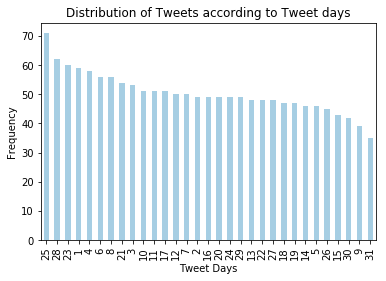

In [116]:
df_master.tweet_day.value_counts().plot(kind='bar', colormap='Paired')
plt.title('Distribution of Tweets according to Tweet days')
plt.xlabel('Tweet Days')
plt.ylabel('Frequency')

In [99]:
#finding distribuion of frequency of tweets by tweet months
df_master.tweet_month.value_counts()

12    284
11    213
1     187
2     145
3     144
7     124
6     106
5      92
4      86
10     64
9      60
8      56
Name: tweet_month, dtype: int64

Text(0,0.5,'Frequency')

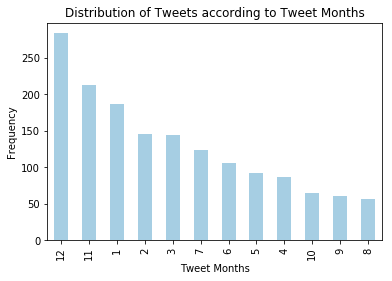

In [117]:
df_master.tweet_month.value_counts().plot(kind='bar', colormap='Paired')
plt.title('Distribution of Tweets according to Tweet Months')
plt.xlabel('Tweet Months')
plt.ylabel('Frequency')

In [100]:
#finding frequency of distribution of tweets by year
df_master.tweet_year.value_counts()

2016    817
2015    391
2017    353
Name: tweet_year, dtype: int64

Text(0,0.5,'Frequency')

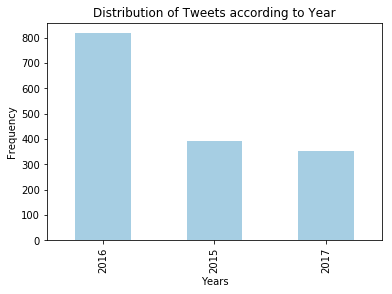

In [118]:
df_master.tweet_year.value_counts().plot(kind='bar', colormap='Paired')
plt.title('Distribution of Tweets according to Year')
plt.xlabel('Years')
plt.ylabel('Frequency')

In [101]:
#finding distribution of rating numerator in data
df_master.rating_numerator.value_counts()

12    450
10    419
11    396
13    261
14     35
Name: rating_numerator, dtype: int64

Text(0,0.5,'Frequency')

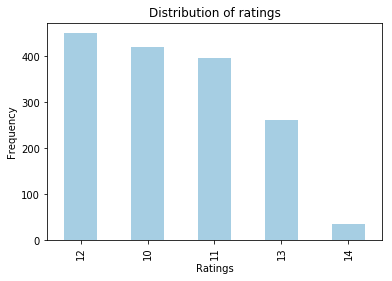

In [119]:
df_master.rating_numerator.value_counts().plot(kind='bar', colormap='Paired')
plt.title('Distribution of ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

In [102]:
#finding more info on highest rating 14 dogs
df_master.query('rating_numerator==14')

tweet_id                                               text  \
9     890240255349198849  This is Cassie. She is a college pup. Studying...   
21    887517139158093824  I've yet to rate a Venezuelan Hover Wiener. Th...   
36    884441805382717440  I present to you, Pup in Hat. Pup in Hat is gr...   
48    881536004380872706  Here is a pupper approaching maximum borkdrive...   
63    878057613040115712  This is Emmy. She was adopted today. Massive r...   
94    870063196459192321  Meet Clifford. He's quite large. Also red. Goo...   
99    868880397819494401  This is Walter. He won't start hydrotherapy wi...   
112   864873206498414592  We only rate dogs. Please don't send in Jesus....   
118   863079547188785154  Ladies and gentlemen... I found Pipsy. He may ...   
130   860184849394610176  Here we have perhaps the wisest dog of all. Ab...   
145   856526610513747968  THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...   
146   856282028240666624  This is Cermet, Paesh, and Morple. They are ab...   
152   854120357044912130  Sometimes you guys remind me just how impactfu...   
161   852226086759018497  Meet General. He wasn't content with the quali...   
164   851464819735769094  This is Iggy. He was a rescue dog killed in th...   
204   841439858740625411  Here we have some incredible doggos for #K9Vet...   
250   832273440279240704  Say hello to Smiley. He's a blind therapy dogg...   
253   831911600680497154  Meet Kuyu. He was trapped in a well for 10 day...   
272   828650029636317184  Occasionally, we're sent fantastic stories. Th...   
275   828381636999917570  Meet Doobert. He's a deaf doggo. Didn't stop h...   
294   825535076884762624  Here's a very loving and accepting puppo. Appe...   
310   822462944365645825  This is Gabe. He was the unequivocal embodimen...   
315   821407182352777218  This is Sundance. He's a doggo drummer. Even s...   
320   820314633777061888  We are proud to support @LoveYourMelon on thei...   
328   819006400881917954  This is Sunny. She was also a very good First ...   
329   819004803107983360  This is Bo. He was a very good First Doggo. 14...   
358   813812741911748608  Meet Gary, Carrie Fisher's dog. Idk what I can...   
394   807621403335917568  This is Ollie Vue. He was a 3 legged pupper on...   
450   794205286408003585  This is Laika. She was a space pupper. The fir...   
542   778408200802557953  RIP Loki. Thank you for the good times. You wi...   
562   774314403806253056  I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC B...   
621   762035686371364864  This left me speechless. 14/10 heckin heroic a...   
662   755206590534418437  This is one of the most inspirational stories ...   
750   742465774154047488  Was just informed about this hero pupper and o...   
1135  685547936038666240  Everybody needs to read this. Jack is our firs...   

      rating_numerator  tweet_day  tweet_month  tweet_year  \
9                   14         26            7        2017   
21                  14         19            7        2017   
36                  14         10            7        2017   
48                  14          2            7        2017   
63                  14         23            6        2017   
94                  14         31            5        2017   
99                  14         28            5        2017   
112                 14         17            5        2017   
118                 14         12            5        2017   
130                 14          4            5        2017   
145                 14         24            4        2017   
146                 14         23            4        2017   
152                 14         17            4        2017   
161                 14         12            4        2017   
164                 14         10            4        2017   
204                 14         14            3        2017   
250                 14         16            2        2017   
253                 14         15            2        2

In [103]:
#finding accuracy of our neural network
df_master.p1_dog.value_counts()

True     1240
False     321
Name: p1_dog, dtype: int64

In [104]:
#Wordcloud of predicted dog names
predwordcloud = WordCloud().generate(' '.join(df_master['p1']))

### Insights:
1. The month of December had the highest number of tweets followed by the months of November, January and February. Is this something that we expect? Perhaps. This is worth further exploration

2. There is a significant difference between the frequency of tweets in 2016 and (2017,2018) as tweets in year 2016 are over 800 and tweets in years 2017 and 2018 are about 300 to 400

3. Rating 14 is given to the least number of dogs when compared to ratings 11, 12 and 13. This is expected because ratings 14 should be preserved for really cute dogs. SHouldn't they?

### Visualization

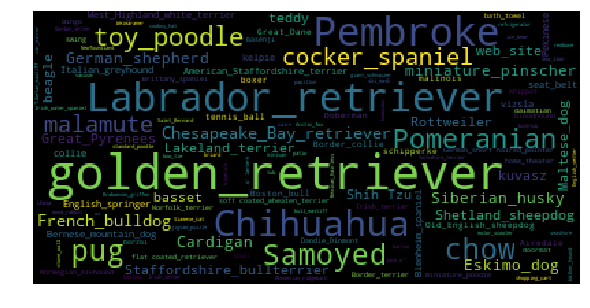

In [123]:
#Frequency of dogs predicted by our neural network with 95% CI
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(predwordcloud)
plt.axis('off')
plt.tight_layout(pad = 0) 

plt.show()